In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az

<IPython.core.display.Javascript object>

In [3]:
def calculate_sigmoid(alpha, beta, x):
    z = alpha + beta * x
    pr = 1 / (1 + np.exp(-z))
    return pr

<IPython.core.display.Javascript object>

In [4]:
x = np.random.normal(0, 5, 1000)
alpha_true = 3
beta_true = 1.5
pr = calculate_sigmoid(alpha_true, beta_true, x)
y_obs = np.random.binomial(1, pr, 1000)

<IPython.core.display.Javascript object>

In [5]:
mask = y_obs == 1
y_obs_censored = y_obs[mask]
x_censored = x[mask]

<IPython.core.display.Javascript object>

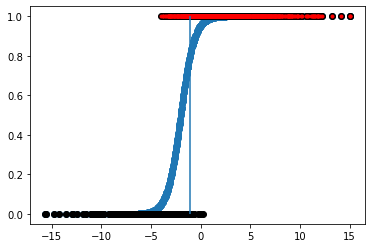

<IPython.core.display.Javascript object>

In [6]:
plt.scatter(x, pr)
plt.scatter(x, y_obs, c="black", marker="o")
plt.vlines(-np.sign(alpha_true) * np.log(np.abs(alpha_true)), 0, 1)
plt.scatter(x_censored, y_obs_censored, c="red", marker=".")

In [7]:
prior_beta_mu = 0
prior_beta_sd = 10
prior_alpha_mu = 0
prior_alpha_b = 10

<IPython.core.display.Javascript object>

In [8]:
with pm.Model() as model_simple:
    alpha = pm.Laplace('alpha', mu=prior_alpha_mu, b=prior_alpha_b)
    beta = pm.Normal('beta', mu=prior_beta_mu, sd=prior_beta_sd)
    mu = alpha + pm.math.dot(x, beta)    
    theta = pm.Deterministic('theta', pm.math.sigmoid(mu))
    bd = pm.Deterministic('bd', -alpha/beta)
    y = pm.Bernoulli('y', p=theta, observed=y_obs)


<IPython.core.display.Javascript object>

In [9]:
with pm.Model() as model_censored:
    alpha = pm.Laplace('alpha', mu=prior_alpha_mu, b=prior_alpha_b)
    beta = pm.Normal('beta', mu=prior_beta_mu, sd=prior_beta_sd)
    mu = alpha + pm.math.dot(x_censored, beta)    
    theta = pm.Deterministic('theta', pm.math.sigmoid(mu))
    bd = pm.Deterministic('bd', -alpha/beta)
    y = pm.Bernoulli('y', p=theta, observed=y_obs_censored)


<IPython.core.display.Javascript object>

In [10]:
with model_simple:
    trace_simple = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 20 seconds.
The number of effective samples is smaller than 25% for some parameters.


<IPython.core.display.Javascript object>

In [11]:
with model_censored:
    trace_censored = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.
There were 415 divergences after tuning. Increase `target_accept` or reparameterize.
There were 313 divergences after tuning. Increase `target_accept` or reparameterize.
There were 360 divergences after tuning. Increase `target_accept` or reparameterize.
There were 245 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


<IPython.core.display.Javascript object>

/Users/juan.lopez.arriaza/opt/anaconda3/envs/base-project/lib/python3.6/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


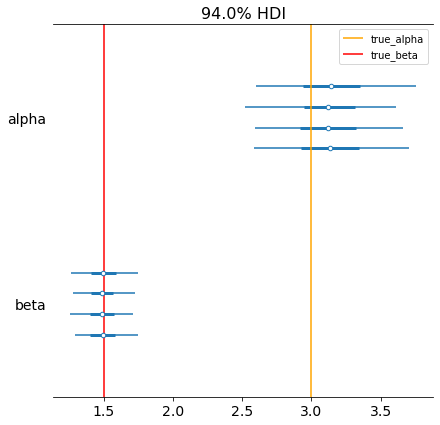

<IPython.core.display.Javascript object>

In [12]:
az.plot_forest(trace_simple, var_names=["alpha", "beta"])
plt.vlines(alpha_true, -100, 100, label="true_alpha", color="orange")
plt.vlines(beta_true, -100, 100, label="true_beta", color="red")
plt.legend()

/Users/juan.lopez.arriaza/opt/anaconda3/envs/base-project/lib/python3.6/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


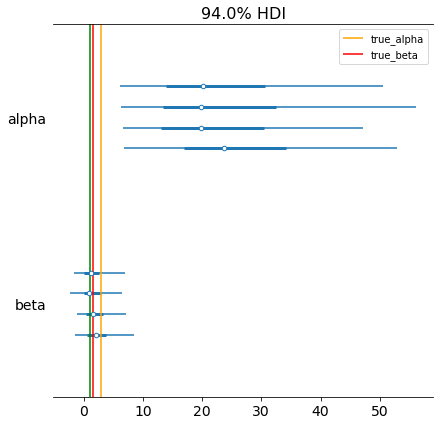

<IPython.core.display.Javascript object>

In [13]:
az.plot_forest(trace_censored, var_names=["alpha", "beta"])
plt.vlines(alpha_true, -100, 100, label="true_alpha", color="orange")
plt.vlines(beta_true, -100, 100, label="true_beta", color="red")
plt.vlines(np.sign(alpha_true) * np.log(np.abs(alpha_true)), -100, 100, color="green")
plt.legend()

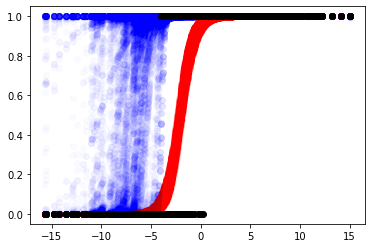

<IPython.core.display.Javascript object>

In [14]:
for sample in range(200):
    plt.scatter(
        x,
        calculate_sigmoid(
            trace_censored["alpha"][sample], trace_censored["beta"][sample], x[:, None]
        ),
        c="blue",
        alpha=0.02,
    )
    plt.scatter(
        x,
        calculate_sigmoid(
            trace_simple["alpha"][sample], trace_simple["beta"][sample], x[:, None]
        ),
        c="red",
        alpha=0.02,
    )

plt.scatter(x, y_obs, c="black")

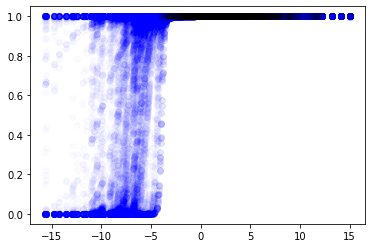

<IPython.core.display.Javascript object>

In [15]:
for sample in range(200):
    plt.scatter(
        x,
        calculate_sigmoid(
            trace_censored["alpha"][sample], trace_censored["beta"][sample], x[:, None]
        ),
        c="blue",
        alpha=0.02,
    )

plt.scatter(x_censored, y_obs_censored, c="black", alpha=0.1)